In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data_path = '../src/data/cleanedTelecomUsersData.csv'
df = pd.read_csv(data_path)

Write a Python program to assign:
engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)
experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster. 

In [4]:
# Calculate average throughput and average TCP retransmission
df['Avg Throughput (MB)'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2 / 1024
df['Avg TCP Retrans (MB)'] = df['TCP DL Retrans. Vol (Bytes)'] / (1024 ** 2)

# Perform k-means clustering for engagement score (using average throughput)
features_engagement = df[['Avg Throughput (MB)']]
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
df['Cluster_Engagement'] = kmeans_engagement.fit_predict(features_engagement)

# Perform k-means clustering for experience score (using average TCP retransmission)
features_experience = df[['Avg TCP Retrans (MB)']]
kmeans_experience = KMeans(n_clusters=3, random_state=42)
df['Cluster_Experience'] = kmeans_experience.fit_predict(features_experience)

# Identify the less engaged cluster (cluster with the lowest average throughput)
less_engaged_cluster_center = kmeans_engagement.cluster_centers_[df.groupby('Cluster_Engagement')['Avg Throughput (MB)'].mean().idxmin()]

# Identify the worst experience cluster (cluster with the highest average TCP retransmission)
worst_experience_cluster_center = kmeans_experience.cluster_centers_[df.groupby('Cluster_Experience')['Avg TCP Retrans (MB)'].mean().idxmax()]

# Calculate engagement score (Euclidean distance to the less engaged cluster center)
df['Engagement_Score'] = df.apply(lambda row: euclidean(row[['Avg Throughput (MB)']], less_engaged_cluster_center), axis=1)

# Calculate experience score (Euclidean distance to the worst experience cluster center)
df['Experience_Score'] = df.apply(lambda row: euclidean(row[['Avg TCP Retrans (MB)']], worst_experience_cluster_center), axis=1)

# Display the first few rows of the dataframe with the new scores
print(df[['Bearer Id', 'Engagement_Score', 'Experience_Score']].head())

      Bearer Id  Engagement_Score  Experience_Score
0  1.311448e+19          0.960511       3073.509096
1  1.311448e+19          0.972718       3073.509096
2  1.311448e+19          0.985902       3073.509096
3  1.311448e+19          0.950257       3073.509096
4  1.311448e+19          0.985902       3073.509096


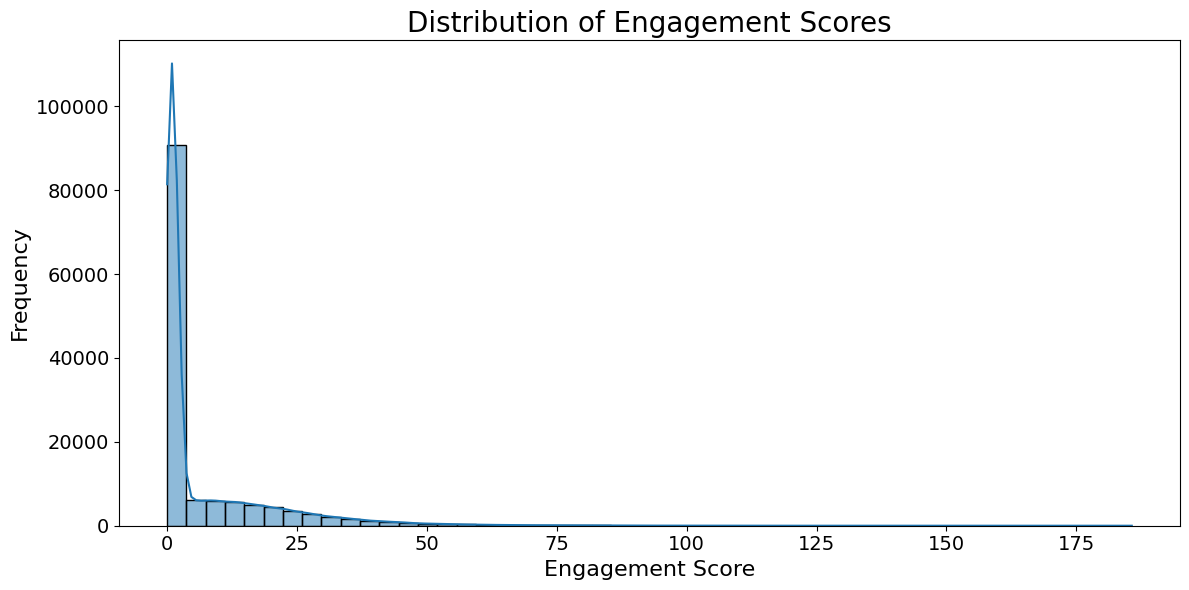

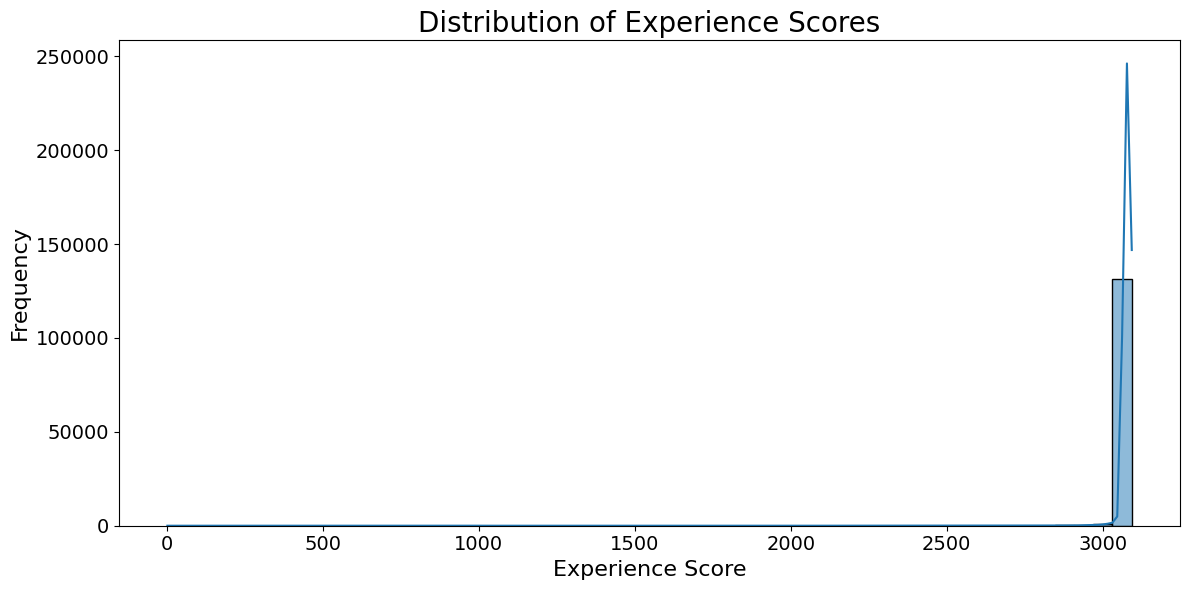

In [93]:
# Plotting the engagement scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Engagement_Score'], bins=50, kde=True)
plt.title('Distribution of Engagement Scores', fontsize=20)
plt.xlabel('Engagement Score', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

# Plotting the experience scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Experience_Score'], bins=50, kde=True)
plt.title('Distribution of Experience Scores', fontsize=20)
plt.xlabel('Experience Score', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [6]:
# Calculate satisfaction score as the average of engagement and experience scores
df['Satisfaction_Score'] = (df['Engagement_Score'] + df['Experience_Score']) / 2

# Report the top 10 satisfied customers
top_10_satisfied_customers = df[['Bearer Id', 'Satisfaction_Score']].sort_values(by='Satisfaction_Score', ascending=True).head(10)

# Display the top 10 satisfied customers
print(top_10_satisfied_customers)

           Bearer Id  Satisfaction_Score
53996   1.304243e+19            9.424551
2607    1.304243e+19           19.252700
53974   1.304243e+19           24.813717
2248    1.304243e+19           30.556608
3498    7.277826e+18           32.062127
69142   1.304243e+19           35.892622
59005   1.304243e+19           43.767334
35095   1.304243e+19           49.384411
103433  7.277826e+18           53.771004
69708   1.311448e+19           54.310404


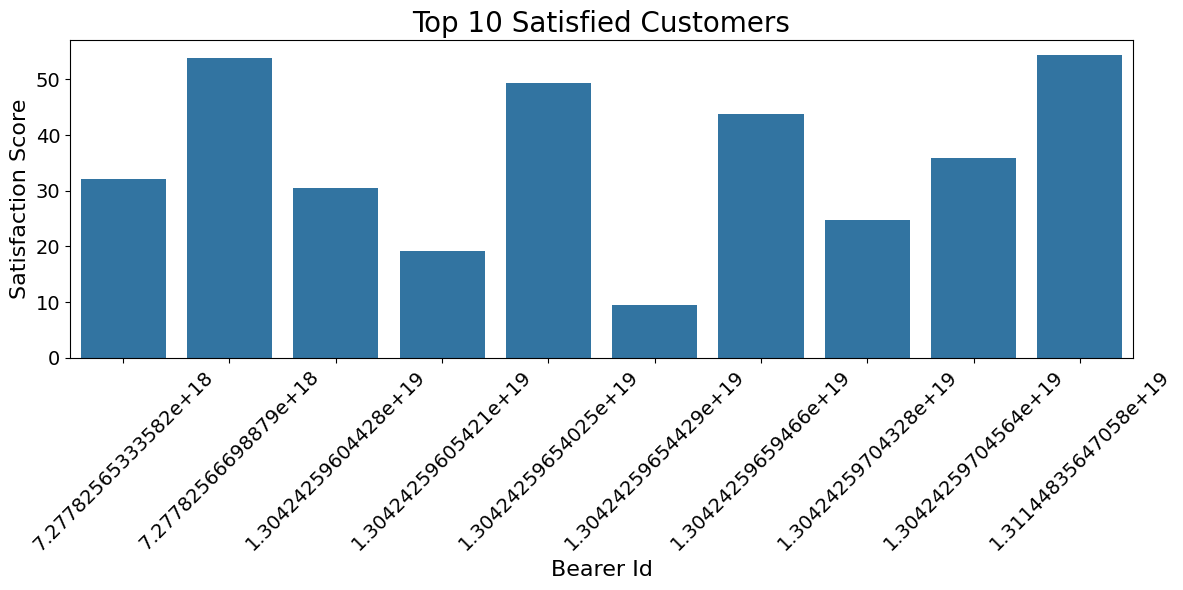

In [7]:
# Plotting the top 10 satisfied customers
plt.figure(figsize=(12, 6))
sns.barplot(x='Bearer Id', y='Satisfaction_Score', data=top_10_satisfied_customers)
plt.title('Top 10 Satisfied Customers', fontsize=20)
plt.xlabel('Bearer Id', fontsize=16)
plt.ylabel('Satisfaction Score', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Normalize the engagement and experience scores
df['Engagement_Score_Norm'] = (df['Engagement_Score'] - df['Engagement_Score'].min()) / (df['Engagement_Score'].max() - df['Engagement_Score'].min())
df['Experience_Score_Norm'] = (df['Experience_Score'] - df['Experience_Score'].min()) / (df['Experience_Score'].max() - df['Experience_Score'].min())

# Calculate satisfaction score as the average of normalized engagement and experience scores
df['Satisfaction_Score'] = (df['Engagement_Score_Norm'] + df['Experience_Score_Norm']) / 2

# Report the top 10 satisfied customers
top_10_satisfied_customers = df[['Bearer Id', 'Satisfaction_Score']].sort_values(by='Satisfaction_Score', ascending=True).head(10)

# Display the top 10 satisfied customers
print(top_10_satisfied_customers)

           Bearer Id  Satisfaction_Score
53996   1.304243e+19            0.045241
2248    1.304243e+19            0.047788
88170   7.277826e+18            0.049570
53974   1.304243e+19            0.050807
2607    1.304243e+19            0.053457
123481  7.277826e+18            0.059257
69708   1.311448e+19            0.062599
58759   7.277826e+18            0.067399
59005   1.304243e+19            0.067851
122375  1.304243e+19            0.075939


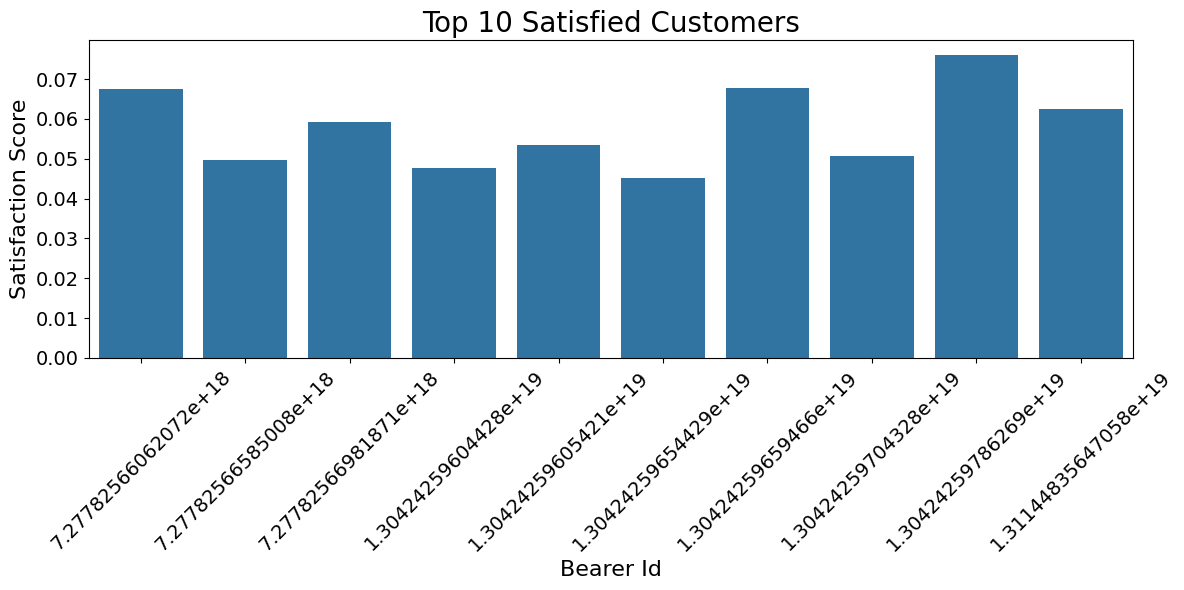

In [12]:
# Plotting the top 10 satisfied customers
plt.figure(figsize=(12, 6))
sns.barplot(x='Bearer Id', y='Satisfaction_Score', data=top_10_satisfied_customers)
plt.title('Top 10 Satisfied Customers', fontsize=20)
plt.xlabel('Bearer Id', fontsize=16)
plt.ylabel('Satisfaction Score', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Rescale the satisfaction scores to a range of 0 to 100
df['Satisfaction_Score_Scaling'] = df['Satisfaction_Score'] * 100

# Report the top 10 satisfied customers with rescaled scores
top_10_satisfied_customers_rescaled = df[['Bearer Id', 'Satisfaction_Score_Scaling']].sort_values(by='Satisfaction_Score_Scaling', ascending=True).head(10)

# Display the top 10 satisfied customers with rescaled scores
print(top_10_satisfied_customers_rescaled)

           Bearer Id  Satisfaction_Score_Scaling
53996   1.304243e+19                    4.524097
2248    1.304243e+19                    4.778773
88170   7.277826e+18                    4.956999
53974   1.304243e+19                    5.080701
2607    1.304243e+19                    5.345748
123481  7.277826e+18                    5.925675
69708   1.311448e+19                    6.259853
58759   7.277826e+18                    6.739935
59005   1.304243e+19                    6.785070
122375  1.304243e+19                    7.593915


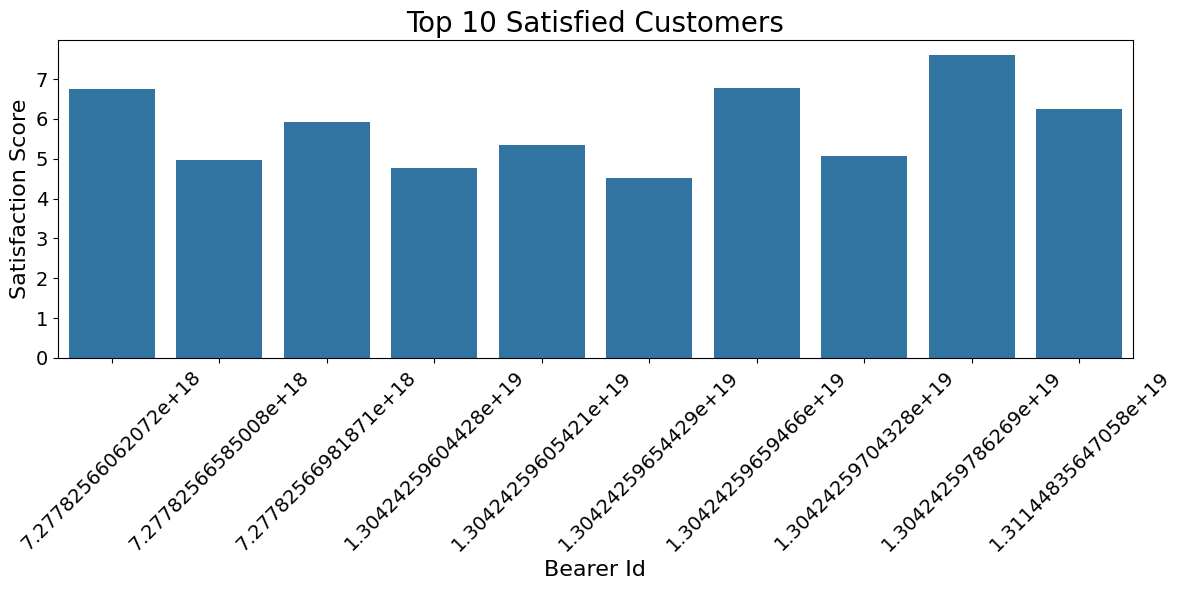

In [14]:
# Plotting the top 10 satisfied customers with rescaled scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Bearer Id', y='Satisfaction_Score_Scaling', data=top_10_satisfied_customers_rescaled)
plt.title('Top 10 Satisfied Customers', fontsize=20)
plt.xlabel('Bearer Id', fontsize=16)
plt.ylabel('Satisfaction Score', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Build a regression model of your choice to predict the satisfaction score of a customer. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features for the regression model
features = ['Avg Throughput (MB)', 'Avg TCP Retrans (MB)', 'Engagement_Score', 'Experience_Score']
X = df[features]
y = df['Satisfaction_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 4.2375384632044345e-32
R-squared: 1.0
                       Coefficient
Avg Throughput (MB)  -3.376793e-17
Avg TCP Retrans (MB) -1.301043e-18
Engagement_Score      2.693123e-03
Experience_Score      1.617675e-04


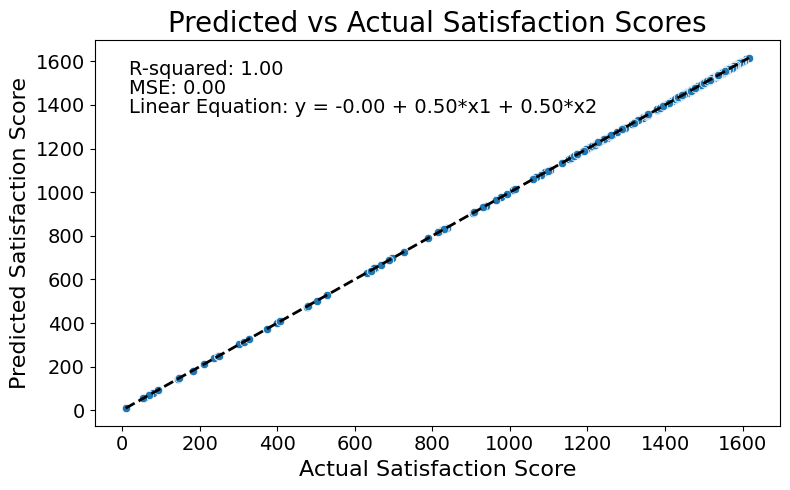

In [42]:
# Generate the linear equation string
linear_equation = f"y = {model.intercept_:.2f}"
for i, coef in enumerate(model.coef_):
    linear_equation += f" + {coef:.2f}*x{i+1}"

# Plotting the predicted vs actual satisfaction scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Satisfaction Scores', fontsize=20)
plt.xlabel('Actual Satisfaction Score', fontsize=16)
plt.ylabel('Predicted Satisfaction Score', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

# Add text for R-squared, MSE, and linear equation
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
plt.text(0.05, 0.90, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
plt.text(0.05, 0.85, f'Linear Equation: {linear_equation}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.tight_layout()
plt.show()

Interpretation:The model is highly accurate in predicting satisfaction scores, as indicated by an R-squared value of 1.0, meaning it explains all the variability of the response data around its mean. The extremely low Mean Squared Error (4.2375384632044345e-32) suggests that the predictions are very close to the actual values. Engagement_Score and Experience_Score have a small positive impact on the predictions, while Avg Throughput and Avg TCP Retrans have negligible effects.

#### Run a k-means (k=2) on the engagement & the experience score. 

In [72]:
# Select the engagement and experience scores for clustering
features_clustering = df[['Engagement_Score', 'Experience_Score']]

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_clustering)

# Display the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Engagement_Score', 'Experience_Score'])
print(cluster_centers)

# Display the first few rows of the dataframe with the cluster labels
print(df[['Bearer Id', 'Engagement_Score', 'Experience_Score', 'Cluster']].head())

   Engagement_Score  Experience_Score
0          7.284677       3077.571308
1         32.983389        986.886483
      Bearer Id  Engagement_Score  Experience_Score  Cluster
0  1.311448e+19          0.960511       3073.509096        0
1  1.311448e+19          0.972718       3073.509096        0
2  1.311448e+19          0.985902       3073.509096        0
3  1.311448e+19          0.950257       3073.509096        0
4  1.311448e+19          0.985902       3073.509096        0


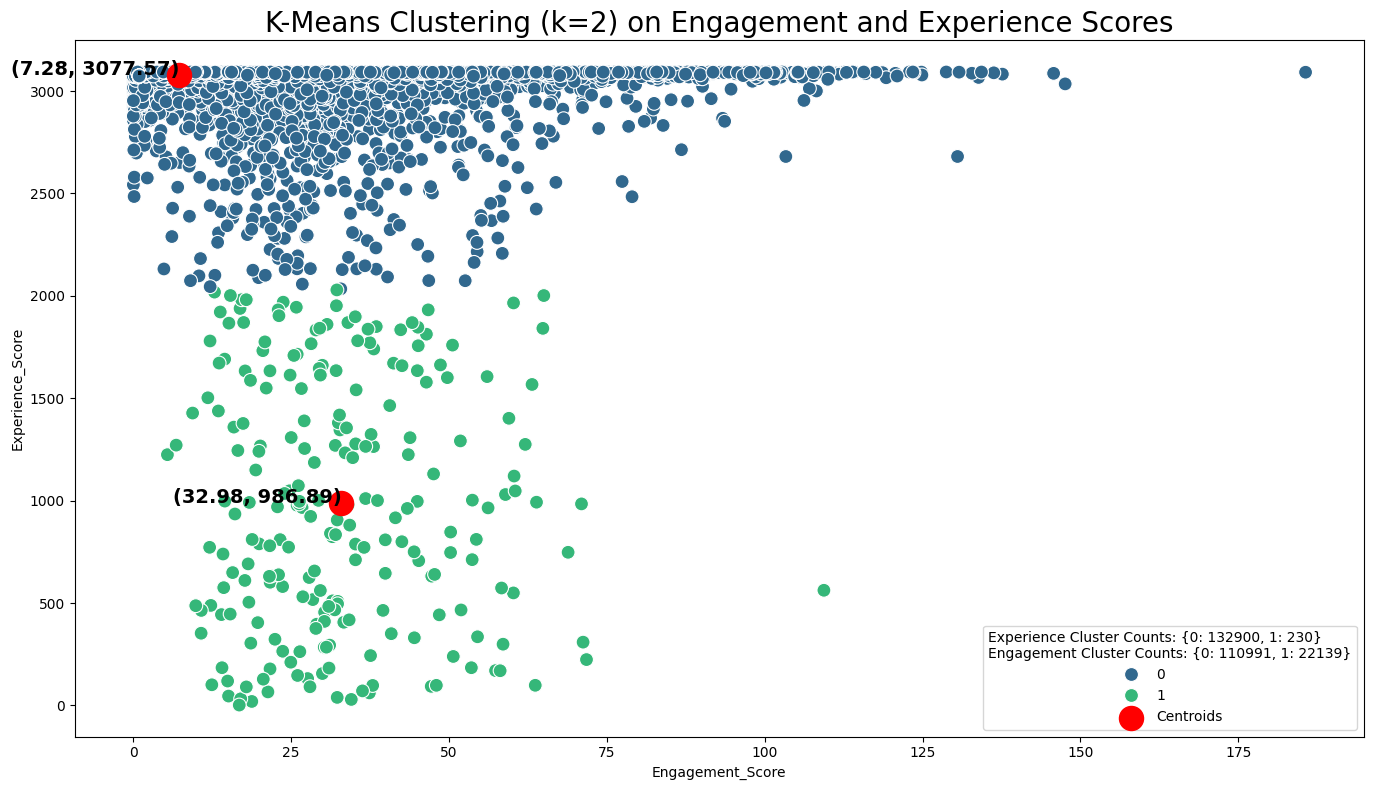

In [74]:
# Select the engagement and experience scores for clustering
features_clustering = df[['Engagement_Score', 'Experience_Score']]

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_clustering)

# Perform k-means clustering with k=2 for engagement score
kmeans_engagement = KMeans(n_clusters=2, random_state=42)
df['Cluster_Engagement'] = kmeans_engagement.fit_predict(df[['Engagement_Score']])

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()
engagement_cluster_counts = df['Cluster_Engagement'].value_counts()

# Plotting the clustering results for engagement and experience scores
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Engagement_Score', y='Experience_Score', hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
for i, (x, y) in enumerate(kmeans.cluster_centers_):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', fontsize=14, color='black', ha='right', fontweight='bold')
plt.title('K-Means Clustering (k=2) on Engagement and Experience Scores', fontsize=20)
plt.legend(title=f'Experience Cluster Counts: {cluster_counts.to_dict()}\nEngagement Cluster Counts: {engagement_cluster_counts.to_dict()}')
plt.tight_layout()
plt.show()

Interpretation: 
The majority of data points fall into Cluster 0 for both engagement and experience scores, indicating higher experience scores but varying engagement scores. Cluster 1 has significantly fewer data points, suggesting fewer individuals in this category. Cluster 0 for engagement scores has 110,991 data points, indicating higher engagement scores, while Cluster 1 has 22,139 data points, indicating lower engagement scores. For experience scores, Cluster 0 has 132,900 data points, indicating higher experience scores, while Cluster 1 has 230 data points, indicating lower experience scores.

#### Aggregate the average satisfaction & experience score per cluster. 

   Cluster  Satisfaction_Score  Experience_Score
0        0         1542.424141       3077.563417
1        1          507.661502        982.336440


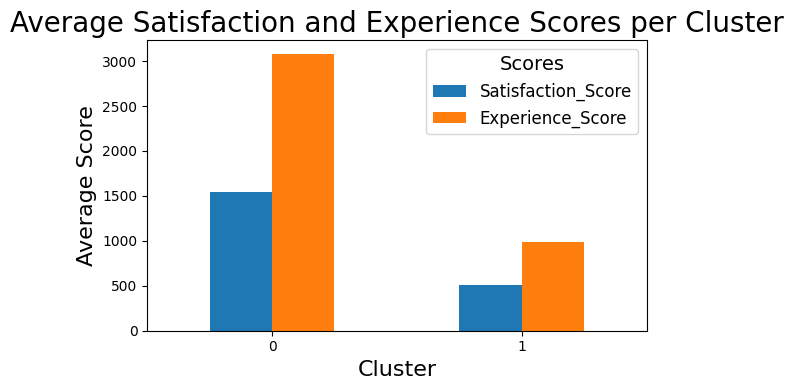

In [92]:
# Select the satisfaction and experience scores for clustering
features_clustering = df[['Satisfaction_Score', 'Experience_Score']]

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_clustering)

# Aggregate the average satisfaction and experience scores per cluster
average_scores_per_cluster = df.groupby('Cluster')[['Satisfaction_Score', 'Experience_Score']].mean().reset_index()
print(average_scores_per_cluster)

# Plotting the average satisfaction and experience scores per cluster
plt.figure(figsize=(6, 4))
average_scores_per_cluster.plot(kind='bar', x='Cluster', ax=plt.gca())
plt.title('Average Satisfaction and Experience Scores per Cluster', fontsize=20)
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Average Score', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Scores', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

Interpretation:Cluster 0 has significantly higher average satisfaction (1542.42) and experience scores (3077.56), indicating highly satisfied individuals with positive experiences. Cluster 1 has much lower average satisfaction (507.66) and experience scores (982.34), indicating less satisfied individuals with poorer experiences.